In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import scipy.stats as st
import seaborn as sns
import os
import datetime

In [2]:
# Find and reference Output File (CSV) from Weather analysis
output_file = "Data/weather_rides_df.csv"

# pull prevously generated and saved output data from csv
weather_rides_df = pd.read_csv(output_file)

weather_rides_df

,date,count_American,count_Carmel,count_Diplo,count_Federal,count_Firstclass,count_Highclass,count_Prestige,count_Skyline,count_Uber,Total,maxtempC,avgtempC,uvIndex,precipMM,cloudcover,humidity,weatherDesc,Weekday
0,2014-07-01,921,2871,1046,11,1744,1368,3345,1668,21228,34202,29.0,26.0,6.0,6.0,30.0,86.0,Moderate or heavy rain shower,Tuesday
1,2014-07-02,1028,2965,1275,4,2228,1661,3533,1691,26480,40865,29.0,27.0,6.0,15.7,28.0,89.0,Moderate or heavy rain shower,Wednesday
2,2014-07-03,1068,3361,1200,12,2121,1599,3649,1157,21597,35764,30.0,27.0,6.0,34.0,38.0,89.0,Torrential rain shower,Thursday
3,2014-07-04,1008,2174,1171,8,1459,1622,3401,337,14148,25328,21.0,20.0,4.0,17.1,43.0,89.0,Moderate or heavy rain shower,Friday
4,2014-07-05,1214,1846,1371,3,1703,1898,4081,276,10890,23282,26.0,23.0,6.0,0.0,4.0,63.0,Sunny,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2014-09-26,1101,2816,1055,1,1934,1801,3598,1477,37504,51287,27.0,21.0,6.0,0.0,4.0,74.0,Sunny,Friday
88,2014-09-27,1291,2240,1301,2,1917,2072,4297,561,39468,53149,30.0,24.0,6.0,0.0,0.0,78.0,Sunny,Saturday
89,2014-09-28,1080,2559,1260,1,1831,2032,3985,633,29656,43037,26.0,24.0,6.0,0.0,12.0,75.0,Sunny,Sunday
90,2014-09-29,772,3225,972,0,1868,1558,3215,1846,29201,42657,25.0,22.0,5.0,0.1,51.0,68.0,Overcast,Monday


In [3]:
# generate some basic statistics
meanMaxTemp=weather_rides_df["maxtempC"].mean()
print(f"The mean daily max temperature is {meanMaxTemp}")

The mean daily max temperature is 25.97826086956522


In [4]:
# generate some basic statistics
medianMaxTemp=weather_rides_df["maxtempC"].median()
print(f"The median daily max temperature is {medianMaxTemp}")

The median daily max temperature is 26.0


In [5]:
# generate some basic statistics
maxMaxTemp=weather_rides_df["maxtempC"].max()
print(f"The highest daily max temperature is {maxMaxTemp}")

The highest daily max temperature is 31.0


In [6]:
# generate some basic statistics
minMaxTemp=weather_rides_df["maxtempC"].min()
print(f"The lowest daily max temperature is {minMaxTemp}")

The lowest daily max temperature is 15.0


In [7]:
# generate some basic statistics
meanUber=weather_rides_df["count_Uber"].mean()
print(f"The mean daily #of Uber rides {meanUber}")

The mean daily #of Uber rides 28842.739130434784


In [8]:
# generate some basic statistics
meanRides=weather_rides_df["Total"].mean()
print(f"The mean daily # of all rides {meanRides}")

The mean daily # of all rides 42039.34782608696


In [9]:
# # Find and reference Output File (CSV) from Weather analysis
# output_file2 = "Data/weekday_df.csv"

# # pull prevously generated and saved output data from csv
# weekday_df = pd.read_csv(output_file2)

# weekday_df

# PLOTS

## Weather plots

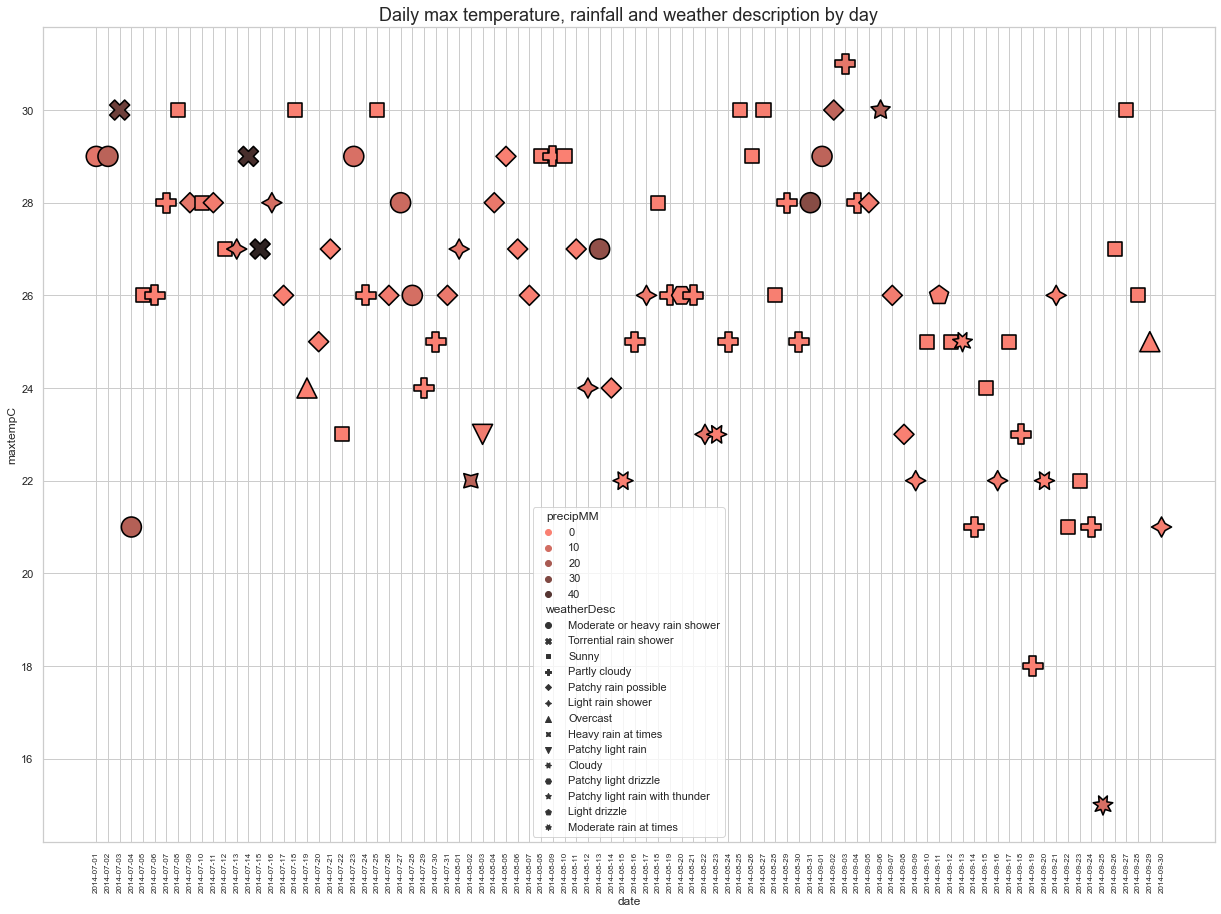

In [60]:
# Seaborn scatter plot
ax=sns.scatterplot(data=weather_rides_df, x="date", y="maxtempC", 
                   hue="precipMM", style="weatherDesc", 
                   s=400, palette="dark:salmon_r", 
                   edgecolor="black"
                  )
sns.set(rc={"figure.figsize":(21, 18)})
sns.set(style = "whitegrid")
plt.xticks(rotation=90, fontsize=8)
# sns.color_palette("rocket", as_cmap=True)
plt.title('Daily max temperature, rainfall and weather description by day', fontsize=18)
plt.savefig('Figures/Plot1_max Temp_date.png')
# plt.axis('equal')
plt.show()

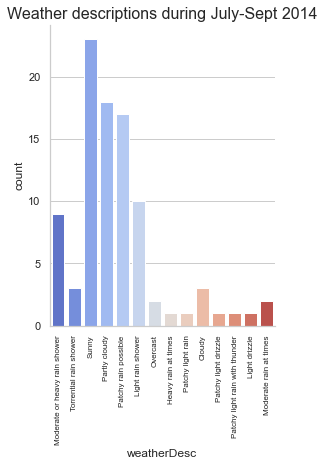

In [11]:
sns.catplot(x="weatherDesc", kind="count", palette="coolwarm", data=weather_rides_df)
# ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize=8)
plt.xticks(rotation=90, fontsize=8)
sns.set(rc={"figure.figsize":(15, 15)})
plt.title('Weather descriptions during July-Sept 2014', fontsize=16)
plt.savefig('Figures/Plot2_WD_count.png')
plt.show()

C:\Users\mosi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


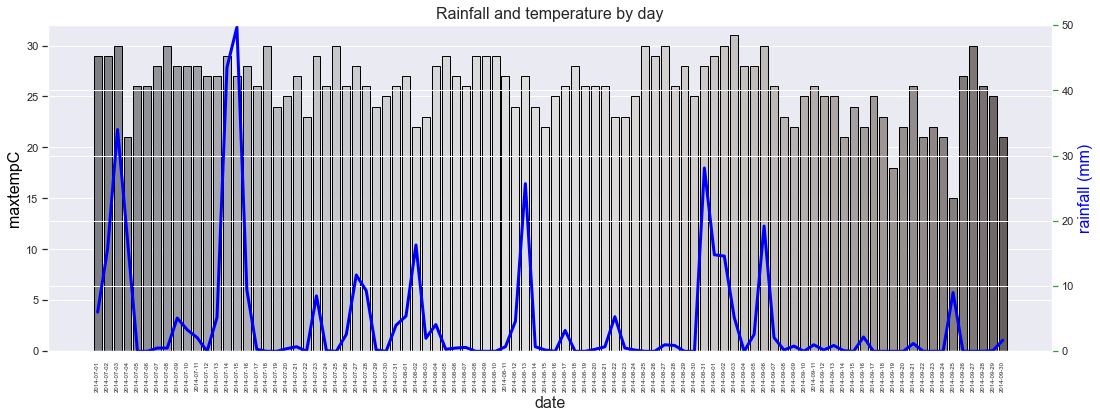

In [12]:
fig, ax1 = plt.subplots(figsize=(18,6))
color = 'tab:green'
ax1.set_title('Rainfall and temperature by day', fontsize=16)
ax1.set_xlabel('Day', fontsize=16)
ax1.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize=6)
ax1.set_ylabel('Maximum Temperature', fontsize=16, color='black')
ax1.set(ylim=(0, 32))
ax2 = sns.barplot(x='date', y='maxtempC', 
                  data = weather_rides_df, 
                  palette='coolwarm', 
                  saturation=0.05, 
                  edgecolor='black')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('rainfall (mm)', fontsize=16, color='blue')
ax2 = sns.lineplot(x='date', y='precipMM', data = weather_rides_df, sort=False, color='blue', linewidth=3)
ax2.tick_params(axis='y', color=color)
ax2.set(ylim=(0, 50))
plt.savefig("Figures/Plot3_rain_temp_date.png")
sns.set(style = "whitegrid")
plt.show()

C:\Users\mosi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


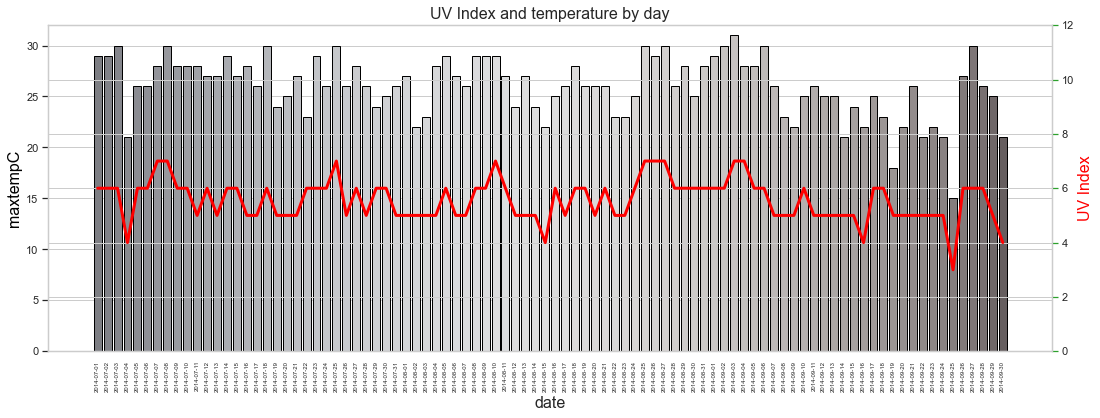

In [13]:
fig, ax1 = plt.subplots(figsize=(18,6))
color = 'tab:green'
ax1.set_title('UV Index and temperature by day', fontsize=16)
ax1.set_xlabel('Day', fontsize=16)
ax1.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize=6)
ax1.set_ylabel('Maximum Temperature', fontsize=16, color='black')
ax1.set(ylim=(0, 32))
ax2 = sns.barplot(x='date', y='maxtempC', 
                  data = weather_rides_df, 
                  palette='coolwarm', 
                  saturation=0.05, 
                  edgecolor='black')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('UV Index', fontsize=16, color='red')
ax2 = sns.lineplot(x='date', y='uvIndex', data = weather_rides_df, sort=False, color='red', linewidth=3)
ax2.tick_params(axis='y', color=color)
ax2.set(ylim=(0, 12))
plt.savefig("Figures/Plot4_uv_temp_date.png")
sns.set(style = "whitegrid")
plt.show()

C:\Users\mosi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


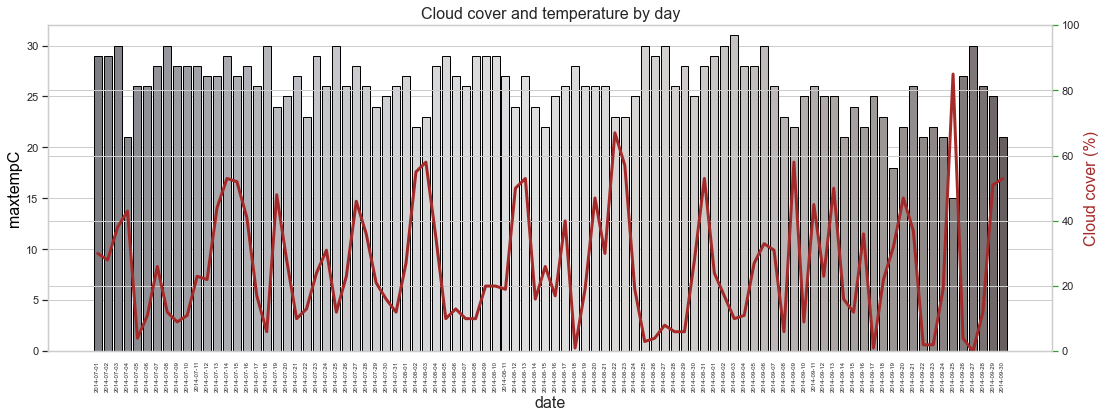

In [14]:
fig, ax1 = plt.subplots(figsize=(18,6))
color = 'tab:green'
ax1.set_title('Cloud cover and temperature by day', fontsize=16)
ax1.set_xlabel('Day', fontsize=16)
ax1.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize=6)
ax1.set_ylabel('Maximum Temperature', fontsize=16, color='black')
ax1.set(ylim=(0, 32))
ax2 = sns.barplot(x='date', y='maxtempC',
                  data = weather_rides_df,
                  palette='coolwarm', 
                  saturation=0.05, 
                  edgecolor='black')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Cloud cover (%)', fontsize=16, color='brown')
ax2 = sns.lineplot(x='date', y='cloudcover', data = weather_rides_df, sort=False, color='brown', linewidth=3)
ax2.tick_params(axis='y', color=color)
ax2.set(ylim=(0, 100))
plt.savefig("Figures/Plot5_clouds_temp_date.png")
sns.set(style = "whitegrid")
plt.show()

C:\Users\mosi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


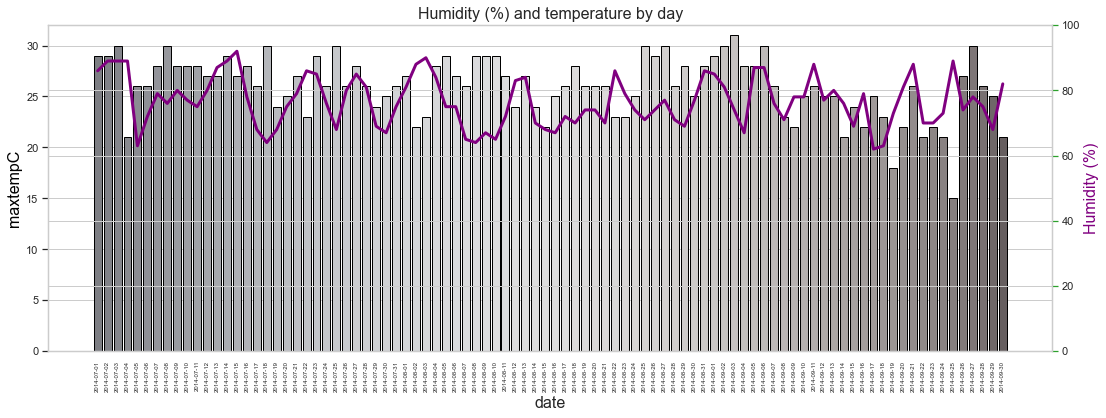

In [15]:
fig, ax1 = plt.subplots(figsize=(18,6))
color = 'tab:green'
ax1.set_title('Humidity (%) and temperature by day', fontsize=16)
ax1.set_xlabel('Day', fontsize=16)
ax1.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize=6)
ax1.set_ylabel('Maximum Temperature', fontsize=16, color='black')
ax1.set(ylim=(0, 32))
ax2 = sns.barplot(x='date', y='maxtempC', 
                  data = weather_rides_df, 
                  palette='coolwarm', 
                  saturation=0.05, 
                  edgecolor='black')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Humidity (%)', fontsize=16, color='purple')
ax2 = sns.lineplot(x='date', y='humidity', data = weather_rides_df, sort=False, color='purple', linewidth=3)
ax2.tick_params(axis='y', color=color)
ax2.set(ylim=(0, 100))
plt.savefig("Figures/Plot6_hum_temp_date.png")
sns.set(style = "whitegrid")
plt.show()

## Weather vs rides plots

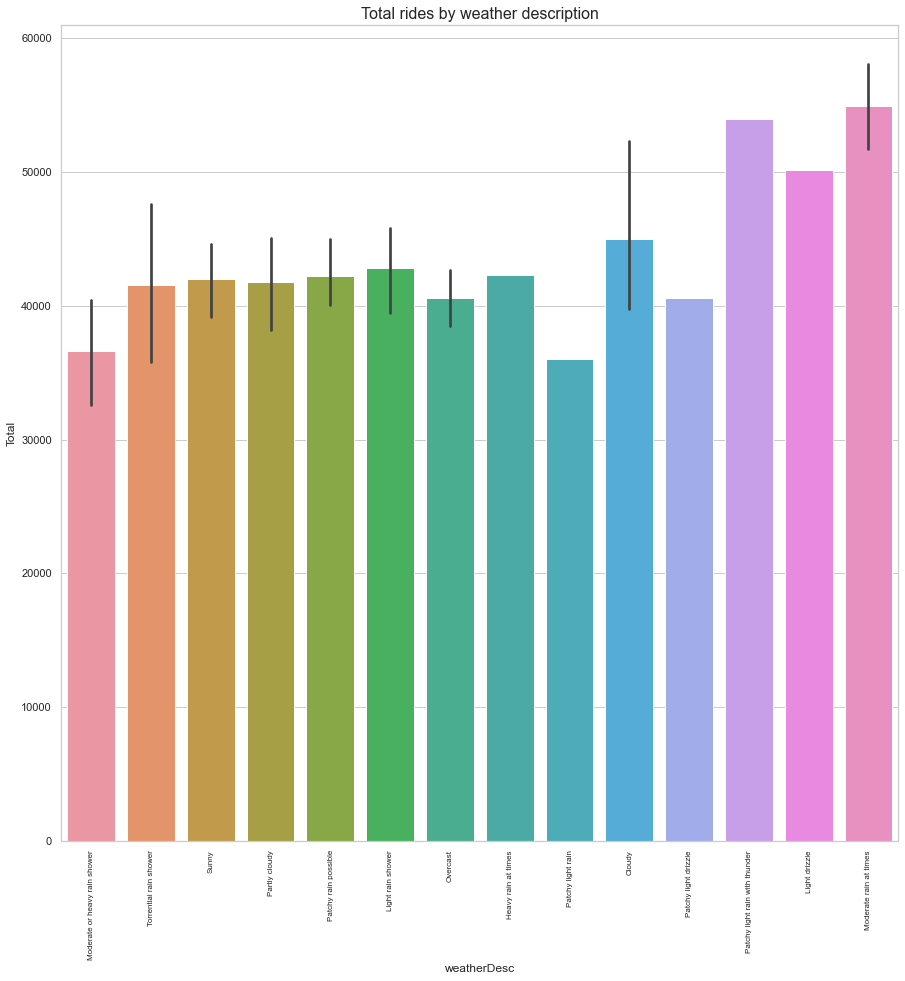

In [16]:
ax = sns.barplot(x = 'weatherDesc', y = 'Total',data = weather_rides_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize=8)
sns.set(rc={"figure.figsize":(7, 6)})
plt.title('Total rides by weather description', fontsize=16)
plt.savefig('Figures/Plot7_WD_totalrides.png')
plt.show()

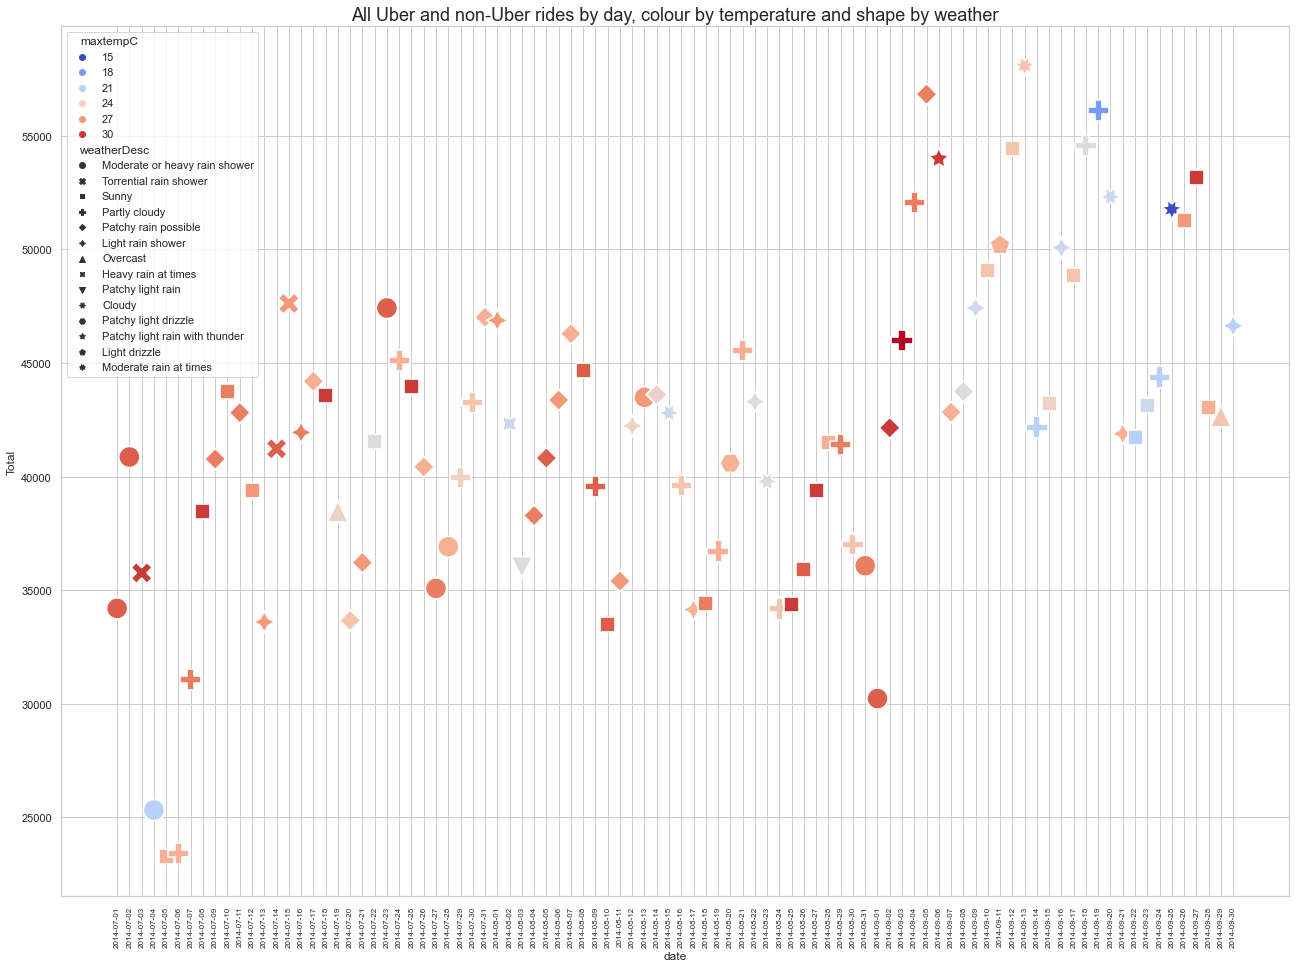

In [53]:
# Seaborn scatter plot total of all Uber and non-Uber rides by day colour and shape by weather
ax=sns.scatterplot(data=weather_rides_df, x="date", y="Total", 
                   hue="maxtempC", 
                   style="weatherDesc", 
                   s=450, palette="coolwarm"
                  )
sns.set(rc={"figure.figsize":(22, 18)})
sns.set(style = "whitegrid")
plt.title('All Uber and non-Uber rides by day, colour by temperature and shape by weather', fontsize=18)
# ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.xticks(rotation=90, fontsize=8)
plt.savefig("Figures/Plot8_allrides_temp_date.png")
# plt.axis('equal') style="weatherDesc",
plt.show()

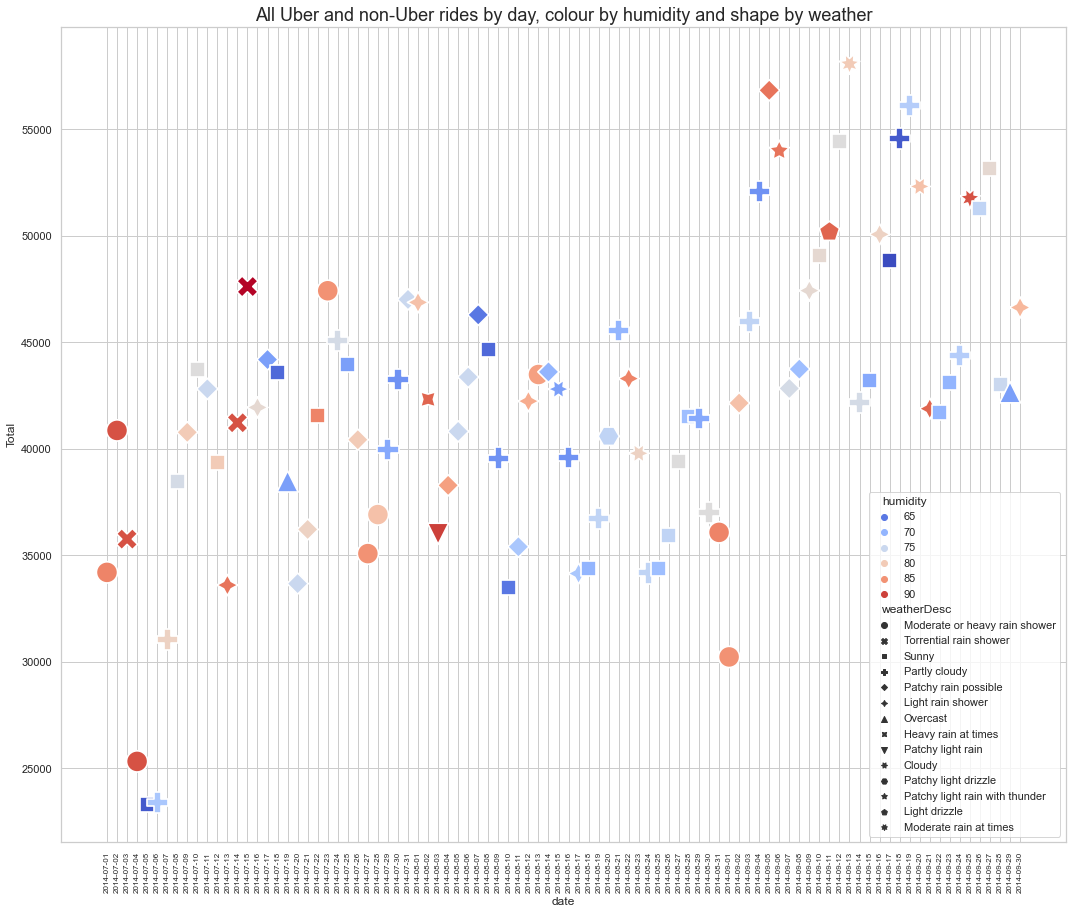

In [18]:
# Seaborn scatter plot total of all Uber and non-Uber rides by day colour by humidity and shape by weather
ax=sns.scatterplot(data=weather_rides_df, x="date", y="Total", 
                   hue="humidity", 
                   style="weatherDesc", 
                   s=450, palette="coolwarm"
                  )
sns.set(rc={"figure.figsize":(18, 15)})
sns.set(style = "whitegrid")
plt.title('All Uber and non-Uber rides by day, colour by humidity and shape by weather', fontsize=18)
# ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.xticks(rotation=90, fontsize=8)
plt.savefig("Figures/Plot9_allrides_hum_date.png")
# plt.axis('equal') style="weatherDesc",
plt.show()

In [19]:
# with sns.axes_style(style='ticks'):
#     g = sns.factorplot("maxtempC", "humidity", "uvIndex", data=weather_rides_df, kind="box")
#     g.set_axis_labels("date", "Total");
#     sns.set(rc={"figure.figsize":(25, 26)})
#     plt.show()    

In [20]:
# #create bar plot for average temps by month
# plt.title('max temp Temperature by day')
# ax=sns.barplot(x='date', y='maxtempC', data=weather_rides_df, palette='coolwarm')
# ax.set_xticklabels(ax.get_xticklabels(),rotation = 75, fontsize=7)
# plt.savefig('Figures/max_temp_day.png')
# plt.show() 

In [21]:
# # create line plot for average percipitation levels
# plt.title('Average Percipitation Percentage by day', fontsize=18)
# ax=sns.lineplot(x='date', y='precipMM', data=weather_rides_df, sort=False)
# ax.set_xticklabels(ax.get_xticklabels(),rotation = 75, fontsize=7)
# plt.show()

C:\Users\mosi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


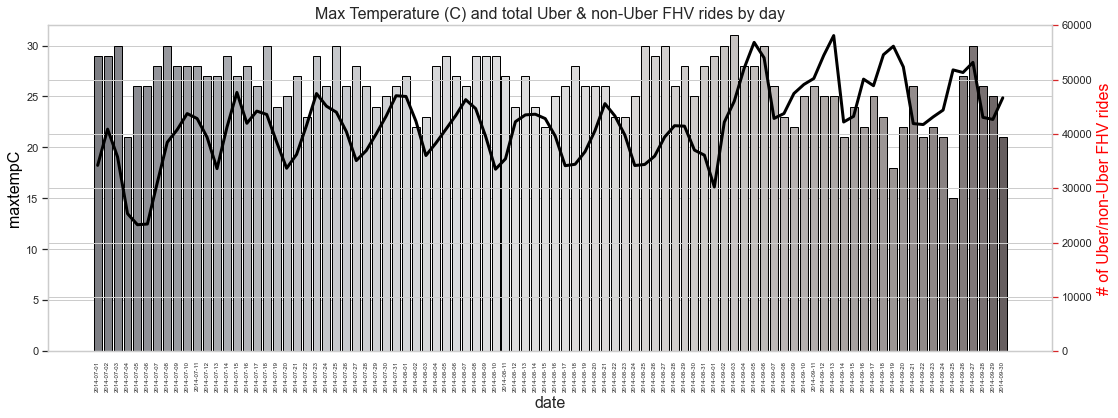

In [22]:
fig, ax1 = plt.subplots(figsize=(18,6))
color = 'tab:green'
ax1.set_title('Max Temperature (C) and total Uber & non-Uber FHV rides by day', fontsize=16)
ax1.set_xlabel('Day', fontsize=16)
ax1.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize=6)
ax1.set(ylim=(0, 32))
ax1.set_ylabel('Max temperature (C)', fontsize=16, color='black')
ax2 = sns.barplot(x='date', y='maxtempC', 
                  data = weather_rides_df, 
                  palette='coolwarm', 
                  saturation=0.05, 
                  edgecolor='black')                  
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('# of Uber/non-Uber FHV rides', fontsize=16, color='red')
ax2 = sns.lineplot(x='date', y='Total', data = weather_rides_df, sort=False, color='black', linewidth=3)
ax2.tick_params(axis='y', color=color)
ax2.set(ylim=(0, 60000))
plt.savefig("Figures/Plot10_maxtemp_ALLtotal-rides_date.png")
plt.show()

C:\Users\mosi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


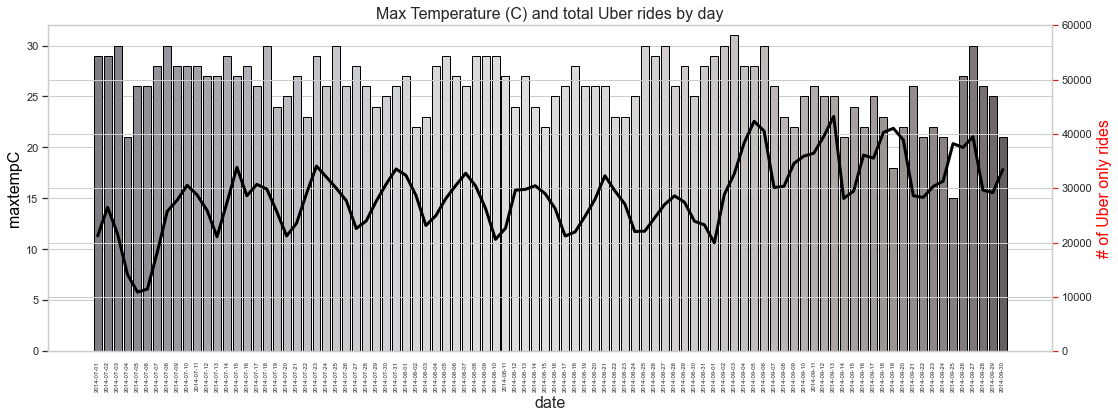

In [23]:
fig, ax1 = plt.subplots(figsize=(18,6))
color = 'tab:green'
ax1.set_title('Max Temperature (C) and total Uber rides by day', fontsize=16)
ax1.set_xlabel('Day', fontsize=16)
ax1.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize=6)
ax1.set(ylim=(0, 32))
ax1.set_ylabel('Max temperature (C)', fontsize=16, color='black')
ax2 = sns.barplot(x='date', y='maxtempC', 
                  data = weather_rides_df, 
                  palette='coolwarm', 
                  saturation=0.05, 
                  edgecolor='black')                  
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('# of Uber only rides', fontsize=16, color='red')
ax2 = sns.lineplot(x='date', y='count_Uber', data = weather_rides_df, sort=False, color='black', linewidth=3)
ax2.tick_params(axis='y', color=color)
ax2.set(ylim=(0, 60000))
plt.savefig("Figures/Plot11_maxtemp_UberOnly-rides_date.png")
plt.show()

C:\Users\mosi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


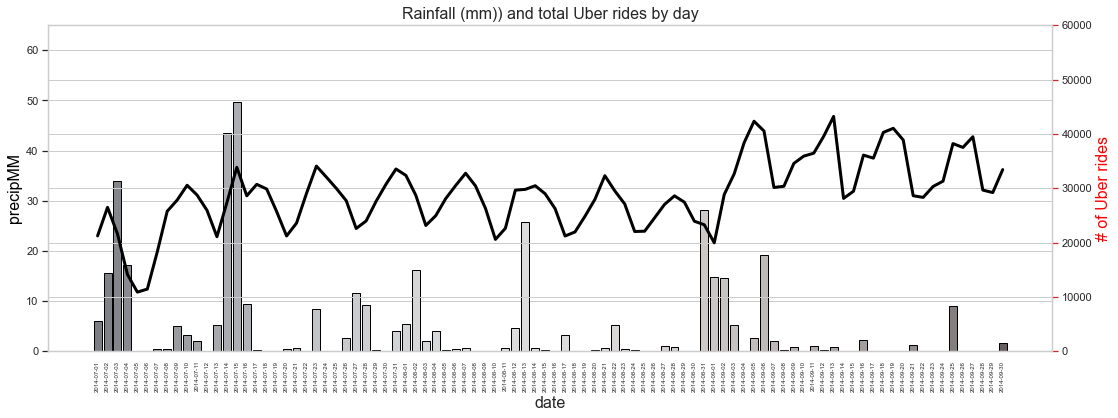

In [24]:
fig, ax1 = plt.subplots(figsize=(18,6))
color = 'tab:green'
ax1.set_title('Rainfall (mm)) and total Uber rides by day', fontsize=16)
ax1.set_xlabel('Day', fontsize=16)
ax1.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize=6)
ax1.set(ylim=(0, 65))
ax1.set_ylabel('Rainfall (mm)', fontsize=16, color='black')
ax2 = sns.barplot(x='date', y='precipMM', 
                  data = weather_rides_df, 
                  palette='coolwarm', 
                  saturation=0.05, 
                  edgecolor='black')                  
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('# of Uber rides', fontsize=16, color='red')
ax2 = sns.lineplot(x='date', y='count_Uber', data = weather_rides_df, sort=False, color='black', linewidth=3)
ax2.tick_params(axis='y', color=color)
ax2.set(ylim=(0, 60000))
plt.savefig("Figures/Plot12_rain_UberOnly-rides_date.png")
plt.show()

C:\Users\mosi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


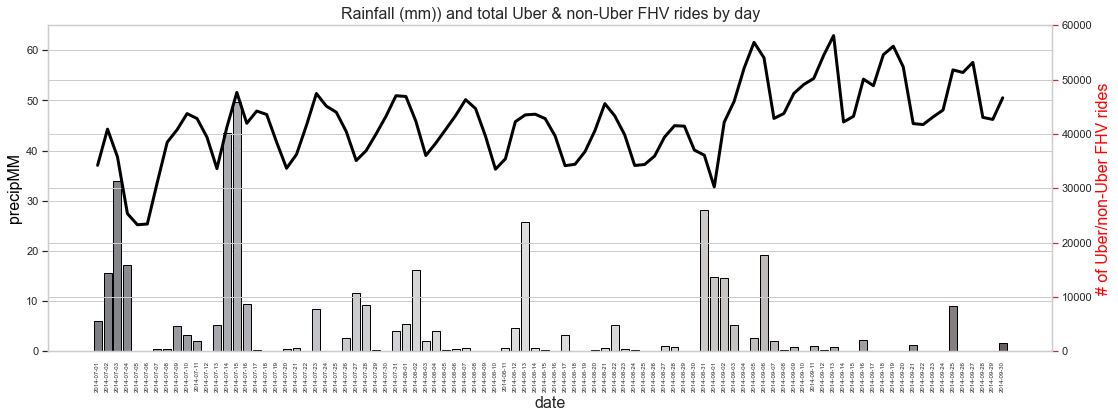

In [25]:
fig, ax1 = plt.subplots(figsize=(18,6))
color = 'tab:green'
ax1.set_title('Rainfall (mm)) and total Uber & non-Uber FHV rides by day', fontsize=16)
ax1.set_xlabel('Day', fontsize=16)
ax1.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize=6)
ax1.set(ylim=(0, 65))
ax1.set_ylabel('Rainfall (mm)', fontsize=16, color='black')
ax2 = sns.barplot(x='date', y='precipMM', 
                  data = weather_rides_df, 
                  palette='coolwarm', 
                  saturation=0.05, 
                  edgecolor='black')                  
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('# of Uber/non-Uber FHV rides', fontsize=16, color='red')
ax2 = sns.lineplot(x='date', y='Total', data = weather_rides_df, sort=False, color='black', linewidth=3)
ax2.tick_params(axis='y', color=color)
ax2.set(ylim=(0, 60000))
plt.savefig("Figures/Plot13_rain_AllTotal-rides_date.png")
plt.show()

C:\Users\mosi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


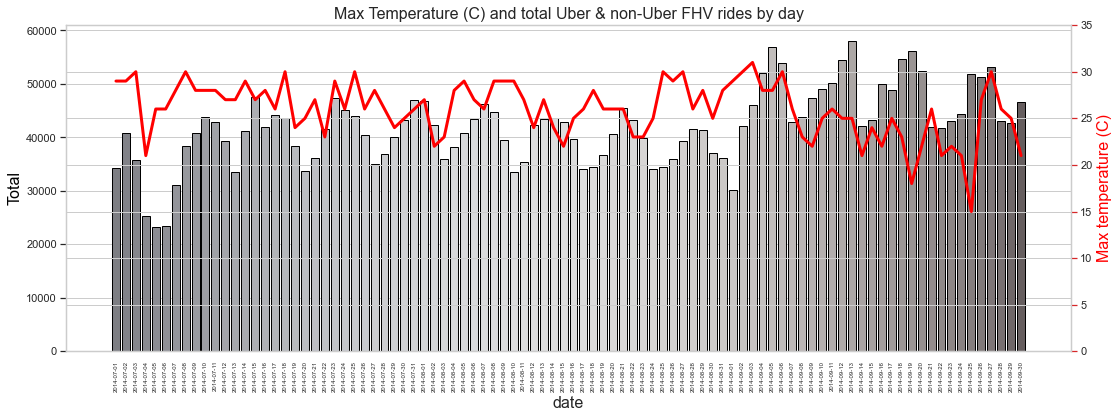

In [26]:
fig, ax1 = plt.subplots(figsize=(18,6))
color = 'tab:green'
ax1.set_title('Max Temperature (C) and total Uber & non-Uber FHV rides by day', fontsize=16)
ax1.set_xlabel('Day', fontsize=16)
ax1.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize=6)
ax1.set_ylabel('# Uber & non-Uber FHV rides by day', fontsize=16, color='black')
ax2 = sns.barplot(x='date', y='Total', 
                  data = weather_rides_df, 
                  palette='coolwarm', 
                  saturation=0.05, 
                  edgecolor='black')                  
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Max temperature (C)', fontsize=16, color='red')
ax2 = sns.lineplot(x='date', y='maxtempC', data = weather_rides_df, sort=False, color='red', linewidth=3)
ax2.tick_params(axis='y', color=color)
ax2.set(ylim=(0, 35))
plt.savefig("Figures/Plot14_maxtemp_ALLtotal-rides_maxtemp_date.png")
plt.show()

C:\Users\mosi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


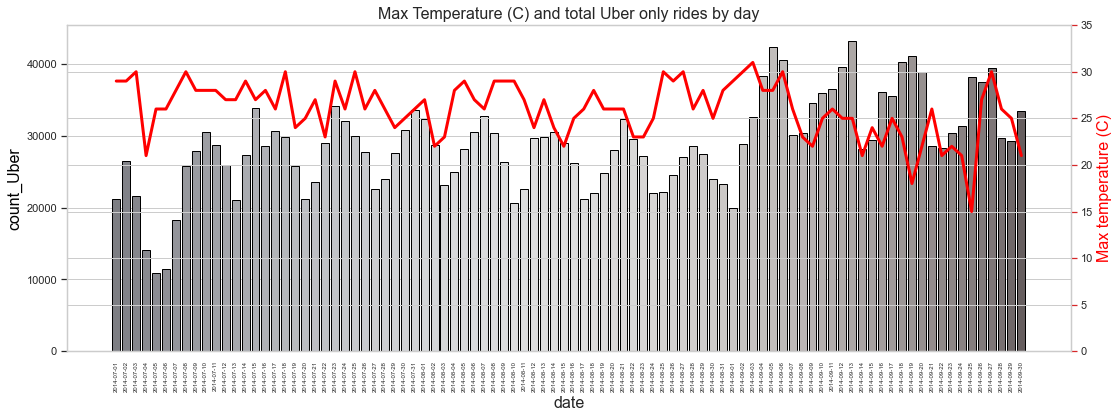

In [27]:
fig, ax1 = plt.subplots(figsize=(18,6))
color = 'tab:green'
ax1.set_title('Max Temperature (C) and total Uber only rides by day', fontsize=16)
ax1.set_xlabel('Day', fontsize=16)
ax1.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize=6)
ax1.set_ylabel('# Uber & non-Uber FHV rides by day', fontsize=16, color='black')
ax2 = sns.barplot(x='date', y='count_Uber', 
                  data = weather_rides_df, 
                  palette='coolwarm', 
                  saturation=0.05, 
                  edgecolor='black')                  
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Max temperature (C)', fontsize=16, color='red')
ax2 = sns.lineplot(x='date', y='maxtempC', data = weather_rides_df, sort=False, color='red', linewidth=3)
ax2.tick_params(axis='y', color=color)
ax2.set(ylim=(0, 35))
plt.savefig("Figures/Plot15_maxtemp_UberOnly-rides_maxtemp_date.png")
plt.show()

C:\Users\mosi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


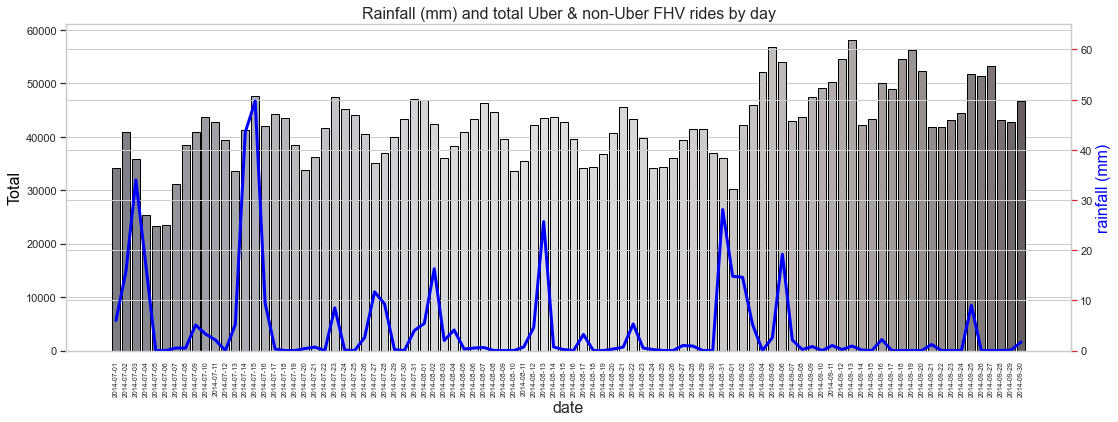

In [28]:
fig, ax1 = plt.subplots(figsize=(18,6))
color = 'tab:green'
ax1.set_title('Rainfall (mm) and total Uber & non-Uber FHV rides by day', fontsize=16)
ax1.set_xlabel('Day', fontsize=16)
ax1.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize=7)
ax1.set_ylabel('# Uber & non-Uber FHV rides by day', fontsize=16, color='black')
ax2 = sns.barplot(x='date', y='Total', 
                  data = weather_rides_df, 
                  palette='coolwarm', 
                  saturation=0.05, 
                  edgecolor='black')                   
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('rainfall (mm)', fontsize=16, color='blue')
ax2 = sns.lineplot(x='date', y='precipMM', data = weather_rides_df, sort=False, color='blue', linewidth=3)
ax2.tick_params(axis='y', color=color)
ax2.set(ylim=(0, 65))
plt.savefig("Figures/Plot16_ALLTotal_rides_&rain_date.png")
plt.show()

C:\Users\mosi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


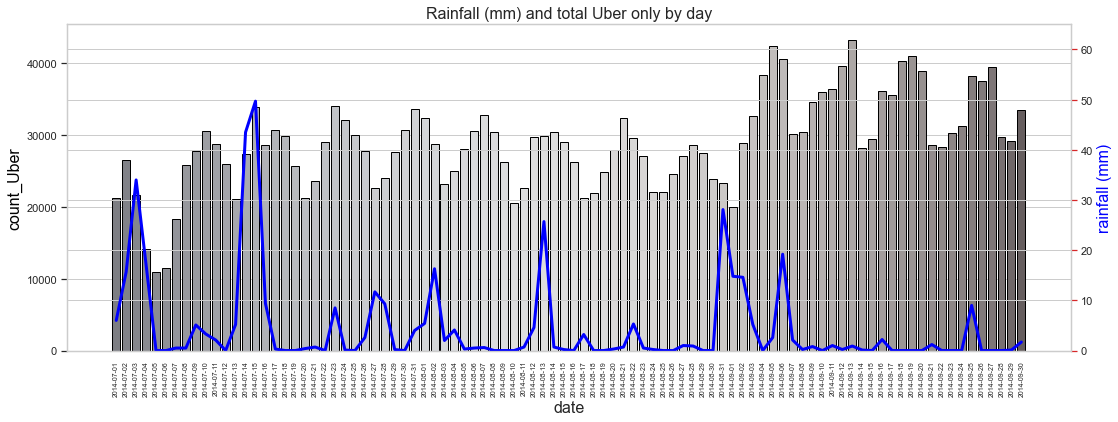

In [29]:
fig, ax1 = plt.subplots(figsize=(18,6))
color = 'tab:green'
ax1.set_title('Rainfall (mm) and total Uber only by day', fontsize=16)
ax1.set_xlabel('Day', fontsize=16)
ax1.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize=7)
ax1.set_ylabel('# Uber only rides by day', fontsize=16, color='black')
ax2 = sns.barplot(x='date', y='count_Uber', 
                  data = weather_rides_df, 
                  palette='coolwarm', 
                  saturation=0.05, 
                  edgecolor='black')                   
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('rainfall (mm)', fontsize=16, color='blue')
ax2 = sns.lineplot(x='date', y='precipMM', data = weather_rides_df, sort=False, color='blue', linewidth=3)
ax2.tick_params(axis='y', color=color)
ax2.set(ylim=(0, 65))
plt.savefig("Figures/Plot17_UberOnly_rides_&rain_date.png")
plt.show()

C:\Users\mosi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


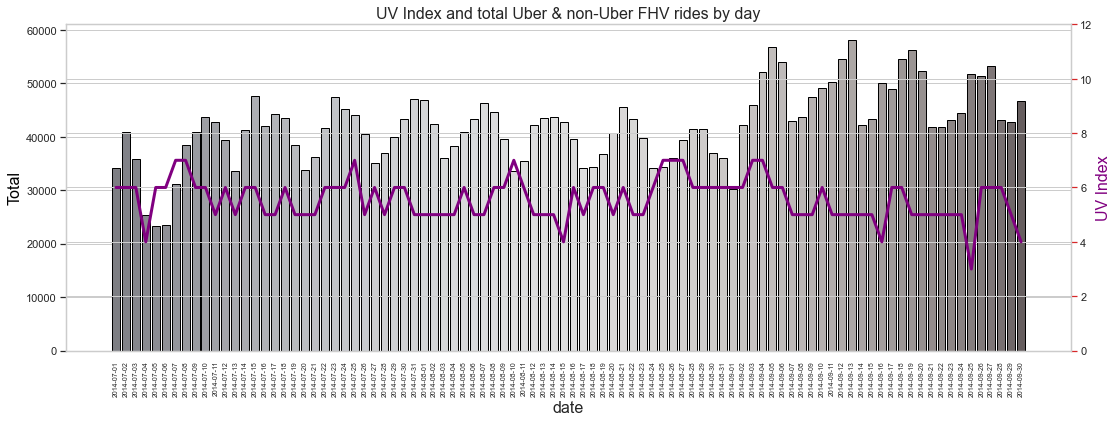

In [30]:
fig, ax1 = plt.subplots(figsize=(18,6))
color = 'tab:green'
ax1.set_title('UV Index and total Uber & non-Uber FHV rides by day', fontsize=16)
ax1.set_xlabel('Day', fontsize=16)
ax1.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize=7)
ax1.set_ylabel('# Uber & non-Uber FHV rides by day', fontsize=16, color='black')
ax2 = sns.barplot(x='date', y='Total', 
                  data = weather_rides_df, 
                  palette='coolwarm', 
                  saturation=0.05, 
                  edgecolor='black')                  
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('UV Index', fontsize=16, color='purple')
ax2 = sns.lineplot(x='date', y='uvIndex', data = weather_rides_df, sort=False, color='purple', linewidth=3)
ax2.tick_params(axis='y', color=color)
ax2.set(ylim=(0, 12))
plt.savefig("Figures/Plot18_ALLTotal_rides_&UVIndex_date.png")
plt.show()

C:\Users\mosi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


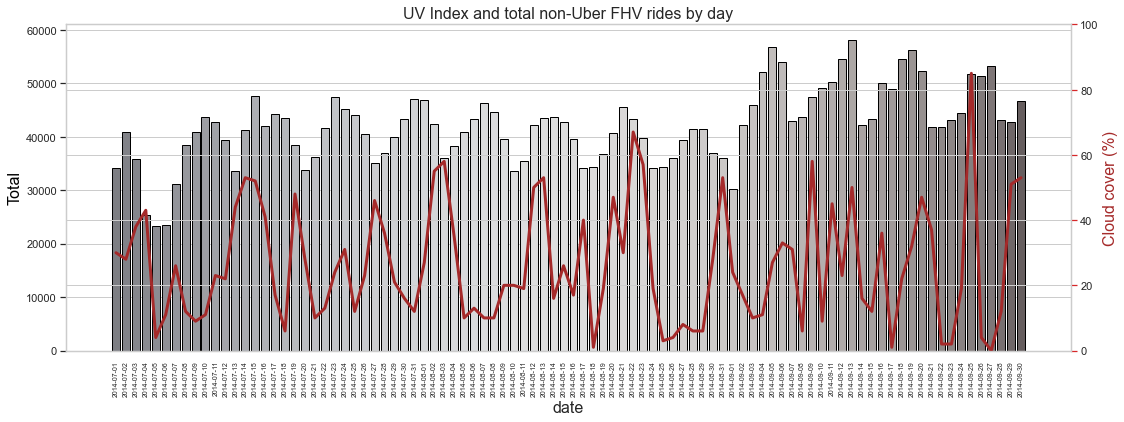

In [31]:
fig, ax1 = plt.subplots(figsize=(18,6))
color = 'tab:green'
ax1.set_title('UV Index and total non-Uber FHV rides by day', fontsize=16)
ax1.set_xlabel('Day', fontsize=16)
ax1.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize=7)
ax1.set_ylabel('Total rides per day', fontsize=16, color='black')
ax2 = sns.barplot(x='date', y='Total', data = weather_rides_df,
                  palette='coolwarm', 
                  saturation=0.05, 
                  edgecolor='black')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Cloud cover (%)', fontsize=16, color='brown')
ax2 = sns.lineplot(x='date', y='cloudcover', data = weather_rides_df, sort=False, color='brown', linewidth=3)
ax2.tick_params(axis='y', color=color)
ax2.set(ylim=(0, 100))
plt.savefig("Figures/Plot19_Total_rides_&clouds_date.png")
plt.show()

C:\Users\mosi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


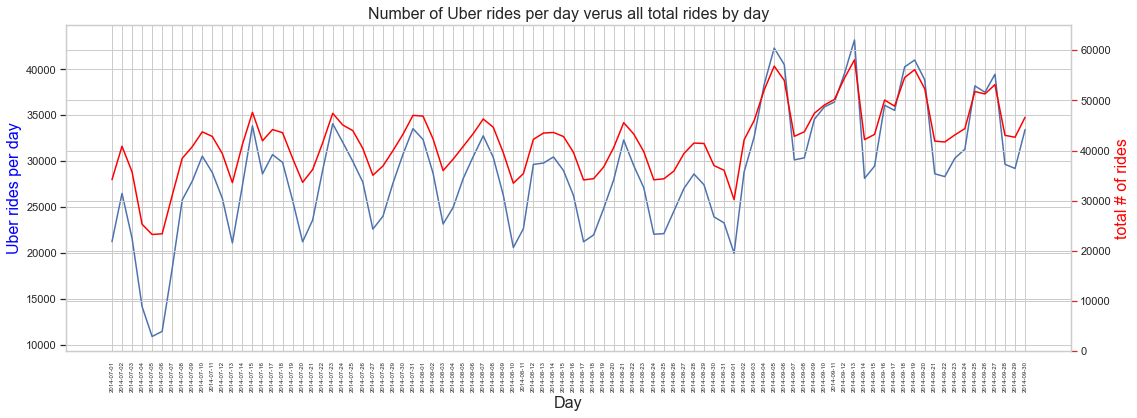

In [32]:
fig, ax1 = plt.subplots(figsize=(18,6))
color = 'tab:green'
ax1.set_title('Number of Uber rides per day verus all total rides by day', fontsize=16)
ax1.set_xlabel('Day', fontsize=16)
ax2.set(ylim=(0, 65000))
ax1.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize=6)
ax1.set_ylabel('Uber rides per day', fontsize=16, color='blue')
ax2 = sns.lineplot(x='date', y='count_Uber', data = weather_rides_df, palette='light:b')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('total # of rides', fontsize=16, color='red')
ax2 = sns.lineplot(x='date', y='Total', data = weather_rides_df, sort=False, color='red')
ax2.tick_params(axis='y', color=color)
ax2.set(ylim=(0, 65000))
plt.savefig("Figures/Plot20_UberOnly_vs_ALLtotal-rides_date.png")
plt.show()

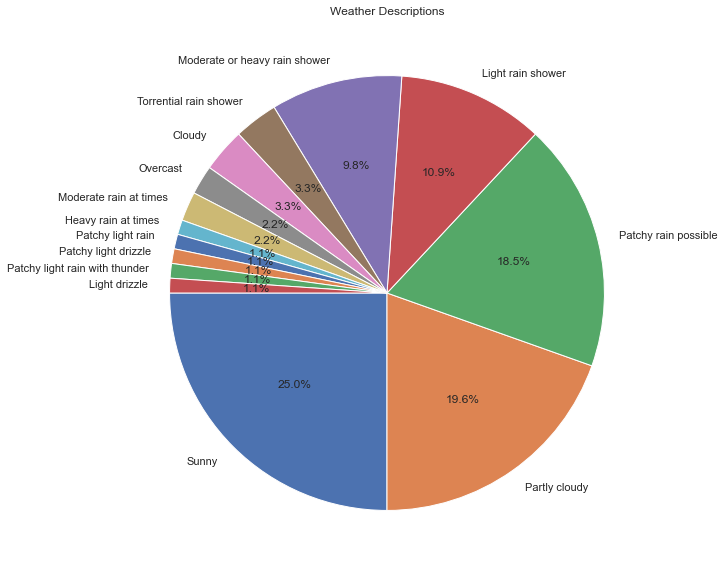

In [33]:
pie=weather_rides_df['weatherDesc'].value_counts().plot(kind='pie', 
                                                        autopct="%1.1f%%", 
                                                        figsize=(10, 10), 
                                                        title="Weather Descriptions",
                                                        startangle=180,)
pie.set_ylabel('')
plt.savefig("Figures/Plot21_pie_WeathDesc.png")
plt.show()

C:\Users\mosi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


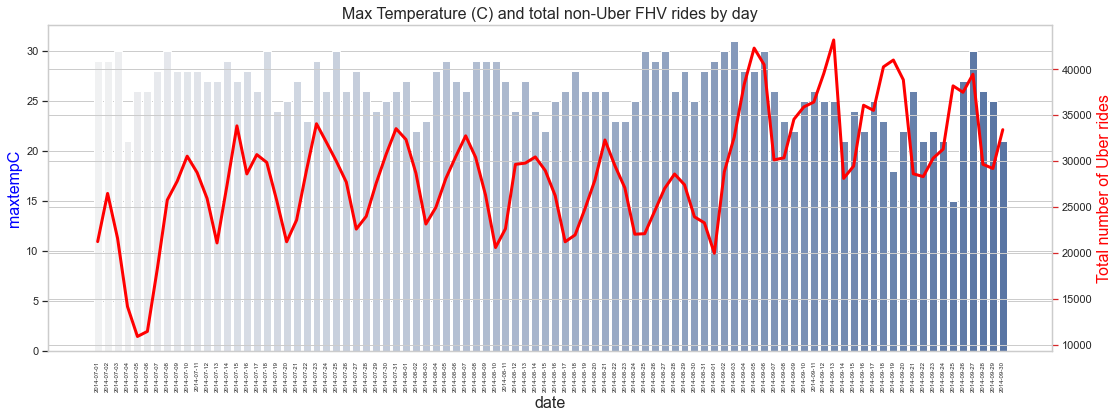

In [34]:
fig, ax1 = plt.subplots(figsize=(18,6))
color = 'tab:green'
ax1.set_title('Max Temperature (C) and total non-Uber FHV rides by day', fontsize=16)
ax1.set_xlabel('Day', fontsize=16)
ax1.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize=6)
ax1.set_ylabel('Max temperature (C)', fontsize=16, color='blue')
ax2 = sns.barplot(x='date', y='maxtempC', data = weather_rides_df, palette='light:b')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total number of Uber rides', fontsize=16, color='red')
ax2 = sns.lineplot(x='date', y='count_Uber', data = weather_rides_df, sort=False, color='red', linewidth=3)
ax2.tick_params(axis='y', color=color)
plt.savefig("Figures/Plot22_maxtemp_total_UBER_rides_date.png")
plt.show()

C:\Users\mosi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


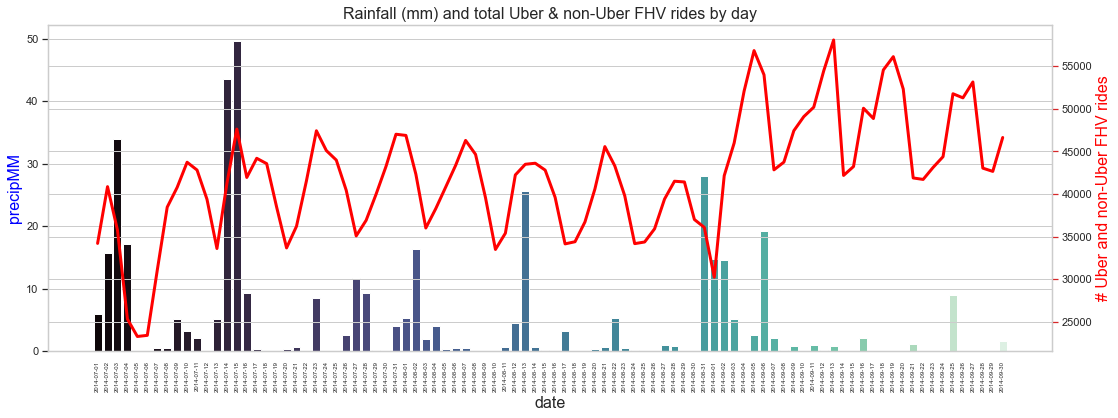

In [35]:
fig, ax1 = plt.subplots(figsize=(18,6))
color = 'tab:green'
ax1.set_title('Rainfall (mm) and total Uber & non-Uber FHV rides by day', fontsize=16)
ax1.set_xlabel('Day', fontsize=16)
ax1.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize=6)
ax1.set_ylabel('Rainfall (mm)', fontsize=16, color='blue')
ax2 = sns.barplot(x='date', y='precipMM', data = weather_rides_df, palette='mako')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('# Uber and non-Uber FHV rides', fontsize=16, color='red')
ax2 = sns.lineplot(x='date', y='Total', data = weather_rides_df, sort=False, color='red', linewidth=3)
ax2.tick_params(axis='y', color=color)
plt.savefig("Figures/Plot23_rain_ALLtotal-rides_date.png")
plt.show()

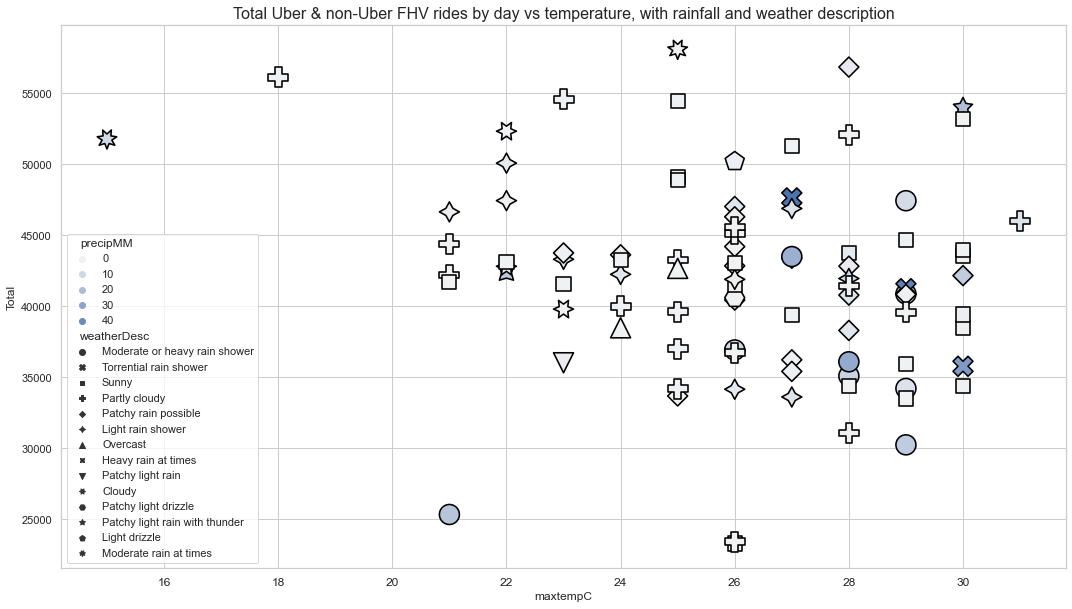

In [36]:
# Seaborn scatter plot total rides and max temp
fig, ax = plt.subplots(figsize=(18,10))
ax.set_title('Total Uber & non-Uber FHV rides by day vs temperature, with rainfall and weather description', fontsize=16)
ax=sns.scatterplot(data=weather_rides_df, x="maxtempC", y="Total", 
                   hue="precipMM", style="weatherDesc", 
                   s=400, palette="light:b", 
                   edgecolor="black"
                  )
sns.set(rc={"figure.figsize":(18, 10)})
sns.set(style = "whitegrid")
plt.xticks(rotation=0, fontsize=12)
# sns.color_palette("rocket", as_cmap=True)
# plt.title('Daily max temperature, rainfall and weather description by day', fontsize=18)
plt.savefig('Figures/Plot24_max Temp_ALLtotal_rides.png')
# plt.axis('equal')
plt.show()

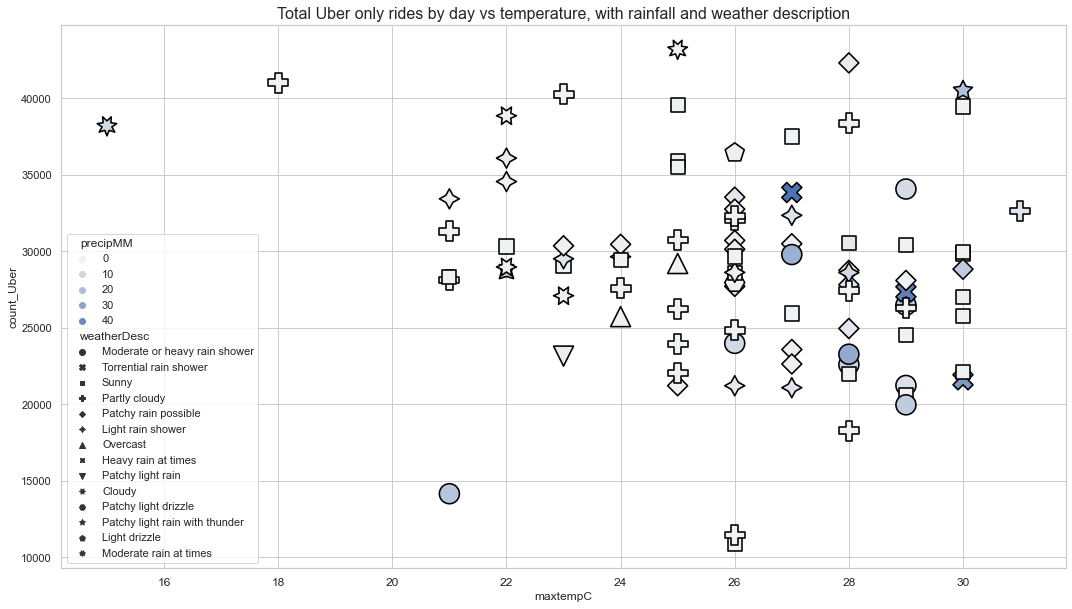

In [37]:
fig, ax = plt.subplots(figsize=(18,10))
ax.set_title('Total Uber only rides by day vs temperature, with rainfall and weather description', 
             fontsize=16)
ax=sns.scatterplot(data=weather_rides_df, x="maxtempC", y="count_Uber", 
                   hue="precipMM", style="weatherDesc", 
                   s=400, palette="light:b", 
                   edgecolor="black"
                  )
sns.set(rc={"figure.figsize":(18, 10)})
sns.set(style = "whitegrid")
plt.xticks(rotation=0, fontsize=12)
plt.savefig('Figures/Plot25_max Temp_UberOnly_rides_SNS.png')
# sns.color_palette("rocket", as_cmap=True)
# plt.title('Daily max temperature, rainfall and weather description by day', fontsize=18)
# plt.axis('equal')
plt.show()

# Correlation and Regression

In [38]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen  ((f"and p={p_val:.15f}")))
r_val, p_val = st.pearsonr(weather_rides_df["Total"], weather_rides_df["count_Uber"])
print(f"The r correlation coefficient of max temp and total rides is r={r_val:.3f}")

The r correlation coefficient of max temp and total rides is r=0.996


In [39]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen  ((f"and p={p_val:.15f}")))
r_val, p_val = st.pearsonr(weather_rides_df["maxtempC"], weather_rides_df["Total"])
print(f"The r correlation coefficient of max temp and total rides is r={r_val:.3f}")

The r correlation coefficient of max temp and total rides is r=-0.204


In [40]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen  ((f"and p={p_val:.15f}")))
r_val, p_val = st.pearsonr(weather_rides_df["maxtempC"], weather_rides_df["count_Uber"])
print(f"The r correlation coefficient of max temp and total Uber rides is r={r_val:.3f}")

The r correlation coefficient of max temp and total Uber rides is r=-0.210


In [41]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen  ((f"and p={p_val:.15f}")))
r_val, p_val = st.pearsonr(weather_rides_df["humidity"], weather_rides_df["Total"])
print(f"The r correlation coefficient of humidity and total rides is r={r_val:.3f}")

The r correlation coefficient of humidity and total rides is r=0.009


In [42]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen  ((f"and p={p_val:.15f}")))
r_val, p_val = st.pearsonr(weather_rides_df["precipMM"], weather_rides_df["Total"])
print(f"The r correlation coefficient of rainfall and total rides is r={r_val:.3f}")

The r correlation coefficient of rainfall and total rides is r=-0.059


In [43]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen  ((f"and p={p_val:.15f}")))
r_val, p_val = st.pearsonr(weather_rides_df["uvIndex"], weather_rides_df["Total"])
print(f"The r correlation coefficient of UV Index and total rides is r={r_val:.3f}")

The r correlation coefficient of UV Index and total rides is r=-0.182


### Regression plots

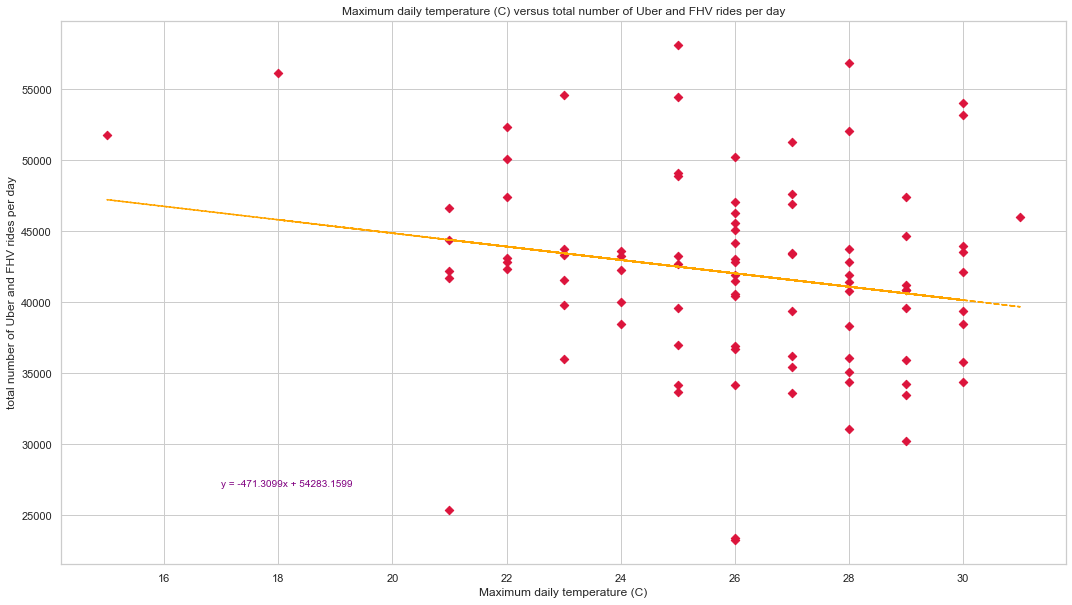

In [44]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weather_rides_df["maxtempC"], weather_rides_df["Total"])
regression = slope * weather_rides_df["maxtempC"] + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.scatter(weather_rides_df["maxtempC"], weather_rides_df["Total"], marker = 'D', color="crimson")
plt.plot(weather_rides_df["maxtempC"], regression, "--", color="orange")
plt.title("Maximum daily temperature (C) versus total number of Uber and FHV rides per day")
plt.xlabel("Maximum daily temperature (C)")
plt.ylabel("total number of Uber and FHV rides per day")
# fig, ax = plt.subplots(figsize=(18,10))
plt.rcParams['figure.figsize'] = [6, 6]
# Annotate linear regression
plt.annotate(line_eq,(17,27000),fontsize=10,color="purple")
plt.savefig('Figures/Reg_max Temp_AllRides.png')
plt.show()

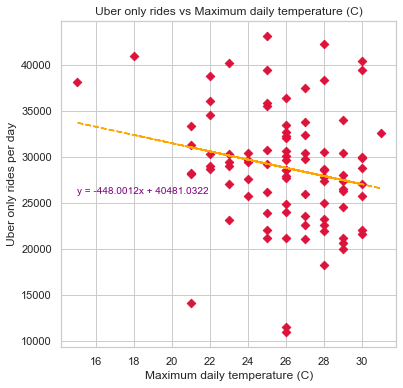

In [45]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weather_rides_df["maxtempC"], weather_rides_df["count_Uber"])
regression = slope * weather_rides_df["maxtempC"] + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.scatter(weather_rides_df["maxtempC"], weather_rides_df["count_Uber"], marker = 'D', color="crimson")
plt.plot(weather_rides_df["maxtempC"], regression, "--", color="orange")
plt.title("Uber only rides vs Maximum daily temperature (C)")
plt.xlabel("Maximum daily temperature (C)")
plt.ylabel("Uber only rides per day")
plt.rcParams['figure.figsize'] = [6, 6]
# Annotate linear regression
plt.annotate(line_eq,(15,26000),fontsize=10,color="purple")
plt.savefig('Figures/Reg_max Temp_UberOnlyRides.png')
plt.show()

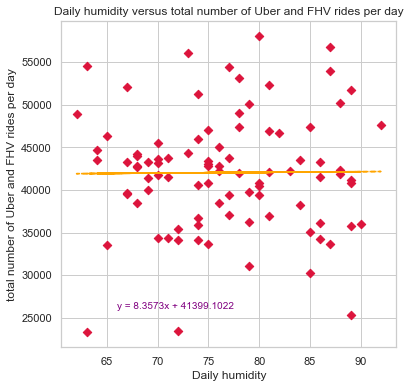

In [46]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weather_rides_df["humidity"], weather_rides_df["Total"])
regression = slope * weather_rides_df["humidity"] + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.scatter(weather_rides_df["humidity"], weather_rides_df["Total"], marker = 'D', color="crimson")
plt.plot(weather_rides_df["humidity"], regression, "--", color="orange")
plt.title("Daily humidity versus total number of Uber and FHV rides per day")
plt.xlabel("Daily humidity")
plt.ylabel("total number of Uber and FHV rides per day")
plt.rcParams['figure.figsize'] = [6, 6]
# Annotate linear regression
plt.annotate(line_eq,(66,26000),fontsize=10,color="purple")
plt.savefig('Figures/Reg_Hum_AllRides.png')
plt.show()

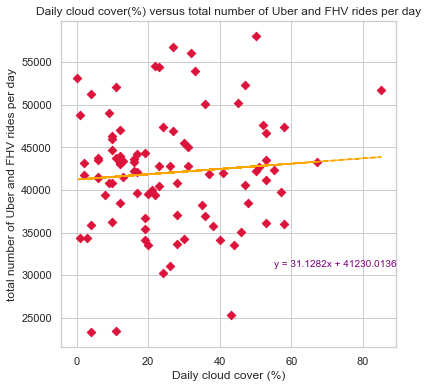

In [47]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weather_rides_df["cloudcover"], weather_rides_df["Total"])
regression = slope * weather_rides_df["cloudcover"] + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.scatter(weather_rides_df["cloudcover"], weather_rides_df["Total"], marker = 'D', color="crimson")
plt.plot(weather_rides_df["cloudcover"], regression, "--", color="orange")
plt.title("Daily cloud cover(%) versus total number of Uber and FHV rides per day")
plt.xlabel("Daily cloud cover (%)")
plt.ylabel("total number of Uber and FHV rides per day")
plt.rcParams['figure.figsize'] = [6, 6]
# Annotate linear regression
plt.annotate(line_eq,(55,31000),fontsize=10,color="purple")
plt.savefig('Figures/Reg_cloud_AllRides.png')
plt.show()

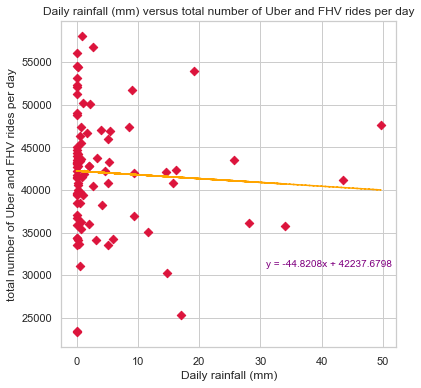

In [48]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weather_rides_df["precipMM"], weather_rides_df["Total"])
regression = slope * weather_rides_df["precipMM"] + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.scatter(weather_rides_df["precipMM"], weather_rides_df["Total"], marker = 'D', color="crimson")
plt.plot(weather_rides_df["precipMM"], regression, "--", color="orange")
plt.title("Daily rainfall (mm) versus total number of Uber and FHV rides per day")
plt.xlabel("Daily rainfall (mm)")
plt.ylabel("total number of Uber and FHV rides per day")
plt.rcParams['figure.figsize'] = [6, 6]
# Annotate linear regression
plt.annotate(line_eq,(31,31000),fontsize=10,color="purple")
plt.savefig('Figures/Reg_Rain_AllRides.png')
plt.show()